**Project Aim:**
To train model to show understanding of minimum of two of the advance machine learning techniques listed within learning

**Project Title**

“Inflation Rate Prediction Using Advanced Deep Learning Techniques”

**Objective**

Build and evaluate a deep learning model that predicts the future inflation rate using:

Time Series Forecasting with LSTM (Recurrent Neural Network)

Gated Recurrent Unit (GRU)

**Problem Statement**

policymakers and business owners struggle with accurate and timely forecasting inflation leading to inappropriate decision in monetary policy, wages and pricing

Investors and Financial institution need accurate inflation prediction to manage risks and allocate resources effectively

The model takes value of features as Crude Oil, Production Level and various Consumer Price Index(CPI) components to predict Infaltion Rate

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Nigeria_Inflation.csv")

# Show the first few rows
df.head()

,"Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education"
0,"2008,1,8.6,94.26,2.17,1.72,75.53443079,84.6128..."
1,"2008,2,8,98.15,2.08,1.63,75.15418502,85.231632..."
2,"2008,3,7.8,103.73,2.06,1.61,78.24252261,83.251..."
3,"2008,4,8.2,116.73,1.96,1.51,79.43426849,84.348..."
4,"2008,5,9.7,126.57,2.05,1.6,80.78367725,85.5740..."


The dataset is currently read as a single column of text, which means the CSV file likely has no proper delimiter specified during reading.

In [3]:
#Let's fix this by specifying the correct delimiter (most likely a comma) 
#and properly splitting it into individual columns. 

df = pd.read_csv("Nigeria_Inflation.csv", header=None)
split_df = df[0].str.split(",", expand=True)
split_df.columns = split_df.iloc[0]
df = split_df[1:].reset_index(drop=True)

In [4]:
df

,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education
0,2008,1,8.6,94.26,2.17,1.72,75.53443079,84.612846,83.86313858,86.53003755,83.12944045,75.2844657
1,2008,2,8,98.15,2.08,1.63,75.15418502,85.23163236,83.3658912,88.35523571,82.88981376,75.45761873
2,2008,3,7.8,103.73,2.06,1.61,78.24252261,83.25151603,86.08299296,84.37630371,81.89347122,74.82684697
3,2008,4,8.2,116.73,1.96,1.51,79.43426849,84.34883049,89.44533239,88.60033375,93.93786522,73.66424802
4,2008,5,9.7,126.57,2.05,1.6,80.78367725,85.57402747,90.54046055,87.93283271,97.55328541,74.88044195
...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024,2,31.7,86.08,1.32,0.87,846.8465333,543.8939686,494.8445684,570.0340878,234.2289477,469.8997124
194,2024,3,33.2,88.8,1.23,0.78,877.4728633,558.8130161,502.9126866,579.8214526,234.6946536,476.8902921
195,2024,4,33.69,93.12,1.28,0.83,899.4533859,571.960431,510.0958787,592.2827526,235.3359754,483.7198405
196,2024,5,33.95,84.01,1.25,0.8,920.0052812,583.8941583,517.3917841,606.4080759,235.8504055,490.7797919


In [5]:
# Combine 'Year' and 'Month' into a datetime column
df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'], errors='coerce')

In [6]:
# Convert numeric columns
numeric_columns = df.columns.drop(['Year', 'Month', 'Date'])
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [7]:
numeric_columns

Index(['Inflation_Rate', 'Crude Oil Price', 'Production', 'Crude Oil Export',
       'CPI_Food', 'CPI_Energy', 'CPI_Health', 'CPI_Transport',
       'CPI_Communication', 'CPI_Education'],
      dtype='object', name=0)

In [8]:
# Sort by date
df = df.sort_values(by='Date').reset_index(drop=True)

In [9]:
# View result
print(df[['Date'] + list(numeric_columns)].head())

0       Date  Inflation_Rate  Crude Oil Price  Production  Crude Oil Export  \
0 2008-01-01             8.6            94.26        2.17              1.72   
1 2008-02-01             8.0            98.15        2.08              1.63   
2 2008-03-01             7.8           103.73        2.06              1.61   
3 2008-04-01             8.2           116.73        1.96              1.51   
4 2008-05-01             9.7           126.57        2.05              1.60   

0   CPI_Food  CPI_Energy  CPI_Health  CPI_Transport  CPI_Communication  \
0  75.534431   84.612846   83.863139      86.530038          83.129440   
1  75.154185   85.231632   83.365891      88.355236          82.889814   
2  78.242523   83.251516   86.082993      84.376304          81.893471   
3  79.434268   84.348830   89.445332      88.600334          93.937865   
4  80.783677   85.574027   90.540461      87.932833          97.553285   

0  CPI_Education  
0      75.284466  
1      75.457619  
2      74.826847  
3   

In [10]:
# Drop rows with missing values
df.dropna().reset_index(drop=True)

,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education,Date
0,2008,1,8.60,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466,2008-01-01
1,2008,2,8.00,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619,2008-02-01
2,2008,3,7.80,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847,2008-03-01
3,2008,4,8.20,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248,2008-04-01
4,2008,5,9.70,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442,2008-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2024,2,31.70,86.08,1.32,0.87,846.846533,543.893969,494.844568,570.034088,234.228948,469.899712,2024-02-01
193,2024,3,33.20,88.80,1.23,0.78,877.472863,558.813016,502.912687,579.821453,234.694654,476.890292,2024-03-01
194,2024,4,33.69,93.12,1.28,0.83,899.453386,571.960431,510.095879,592.282753,235.335975,483.719840,2024-04-01
195,2024,5,33.95,84.01,1.25,0.80,920.005281,583.894158,517.391784,606.408076,235.850405,490.779792,2024-05-01


In [11]:
df.columns

Index(['Year', 'Month', 'Inflation_Rate', 'Crude Oil Price', 'Production',
       'Crude Oil Export', 'CPI_Food', 'CPI_Energy', 'CPI_Health',
       'CPI_Transport', 'CPI_Communication', 'CPI_Education', 'Date'],
      dtype='object', name=0)

In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use 'Inflation Rate' as target and other features as predictors
features = ['Crude Oil Price', 'Production', 'Crude Oil Export',
            'CPI_Food', 'CPI_Energy', 'CPI_Health', 'CPI_Transport',
            'CPI_Communication', 'CPI_Education']

target = 'Inflation_Rate'

In [13]:
df_model = df[['Date'] + features + [target]]

In [14]:
# Scale the features and target
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_model[features + [target]])

In [15]:
# Convert to sequences (e.g., past 12 months → next month)
def create_sequences(data, seq_length=12):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :-1])  # Features
        y.append(data[i + seq_length, -1])     # Target (Inflation Rate)
    return np.array(X), np.array(y)

In [16]:
# Generate sequences
X, y = create_sequences(scaled_data, seq_length=12)

In [17]:
# Train-test split (80-20)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [18]:
# Show shape of LSTM-ready data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (148, 12, 9)
y_train shape: (148,)


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [20]:
print(df.columns.tolist())

['Year', 'Month', 'Inflation_Rate', 'Crude Oil Price', 'Production', 'Crude Oil Export', 'CPI_Food', 'CPI_Energy', 'CPI_Health', 'CPI_Transport', 'CPI_Communication', 'CPI_Education', 'Date']


In [21]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for prediction


C:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [24]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 281ms/step - loss: 0.0414 - val_loss: 0.0073
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0141 - val_loss: 0.0089
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0145 - val_loss: 0.0072
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0097 - val_loss: 0.0085
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0097 - val_loss: 0.0074
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0070 - val_loss: 0.0071
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0104 - val_loss: 0.0079
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0090 - val_loss: 0.0067
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0093 - val_loss: 0.0063
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0079 - val_loss: 0.0088
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0077 - val_loss: 0.0066

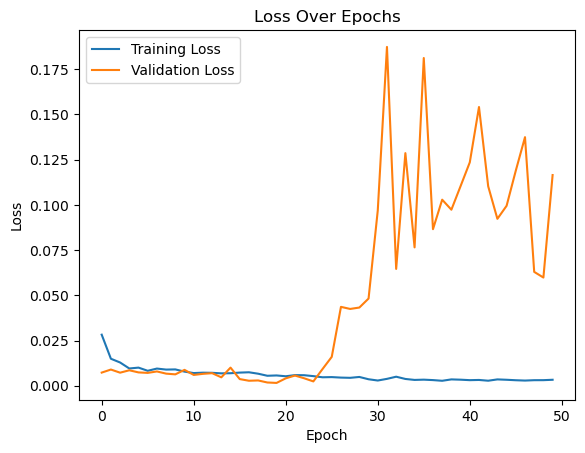

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


In [28]:
# Create separate scalers
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Scale features and target separately
X_scaled = feature_scaler.fit_transform(df[features])
y_scaled = target_scaler.fit_transform(df[[target]])  # double brackets to keep it 2D

In [32]:
# Inverse transform your predictions and true values using the target scaler
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred)

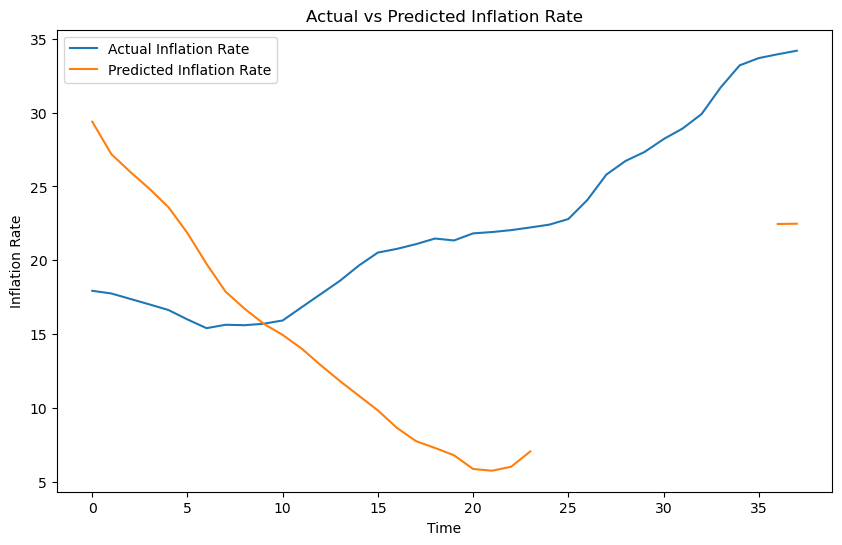

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Inflation Rate')
plt.plot(y_pred_inv, label='Predicted Inflation Rate')
plt.title('Actual vs Predicted Inflation Rate')
plt.xlabel('Time')
plt.ylabel('Inflation Rate')
plt.legend()
plt.show()